<a href="https://colab.research.google.com/github/rishabhnam002/Machine_learning_Project/blob/main/Spam_csv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [7]:
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [19]:
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [20]:
columns_to_drop = [col for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] if col in df.columns]
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
df.sample()

,v1,v2
3792,ham,Hey are you angry with me. Reply me dr.


In [23]:
df.duplicated().sum()

403

In [24]:
df=df.drop_duplicates(keep='first')

In [25]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.duplicated().sum()

0

In [27]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [28]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [29]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

<ipython-input-29-04e53679a36d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [30]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
df['target'] = encoder.fit_transform(df['target'])

<ipython-input-32-08b69ef4a1da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

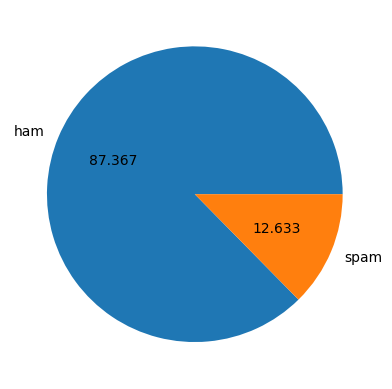

In [36]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.3f")
plt.show()

In [37]:
df['characters_len']=df['text'].apply(len)

<ipython-input-37-e48f1f512d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['characters_len']=df['text'].apply(len)


In [38]:
df.head()

,target,text,characters_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-41-63c504269349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [42]:
df.head()

,target,text,characters_len,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-45-5a4d338196c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [48]:
df[df['target']==0][['num_words','num_sentence','characters_len']].describe()

,num_words,num_sentence,characters_len
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [49]:
df.head()

,target,text,characters_len,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

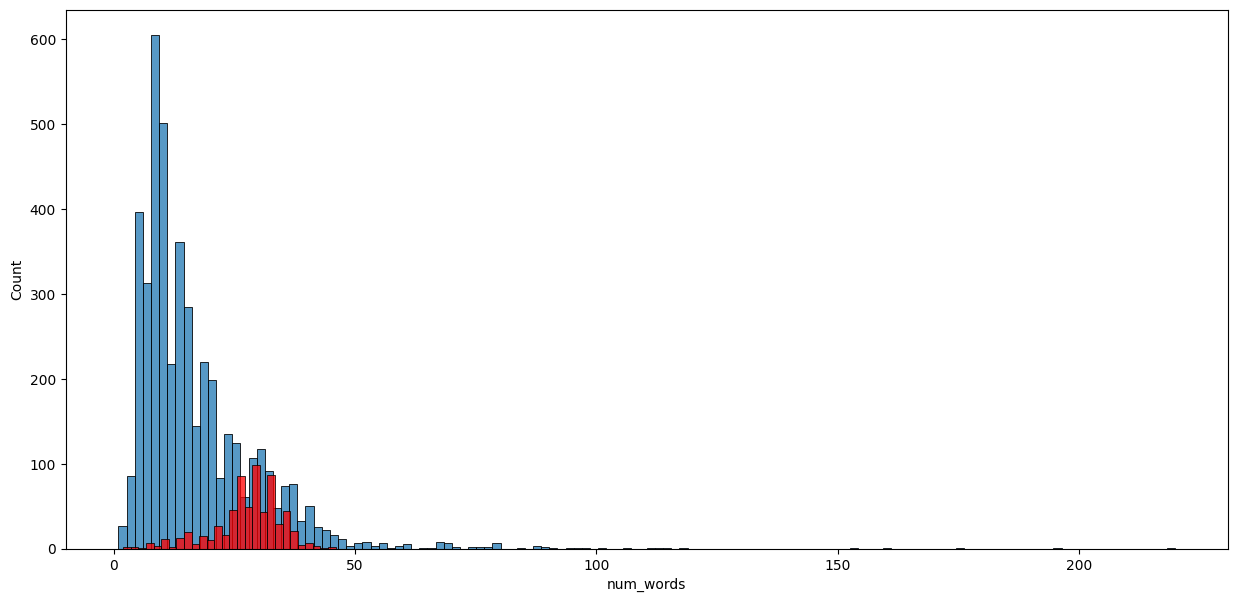

In [52]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

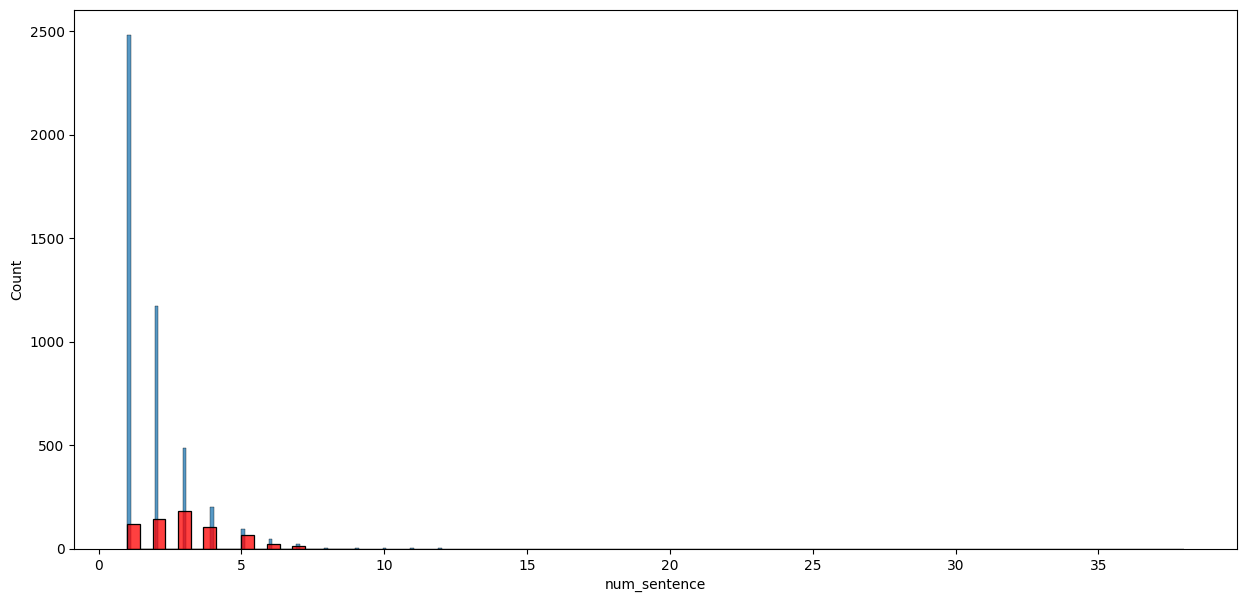

In [54]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='red')

<Axes: xlabel='characters_len', ylabel='Count'>

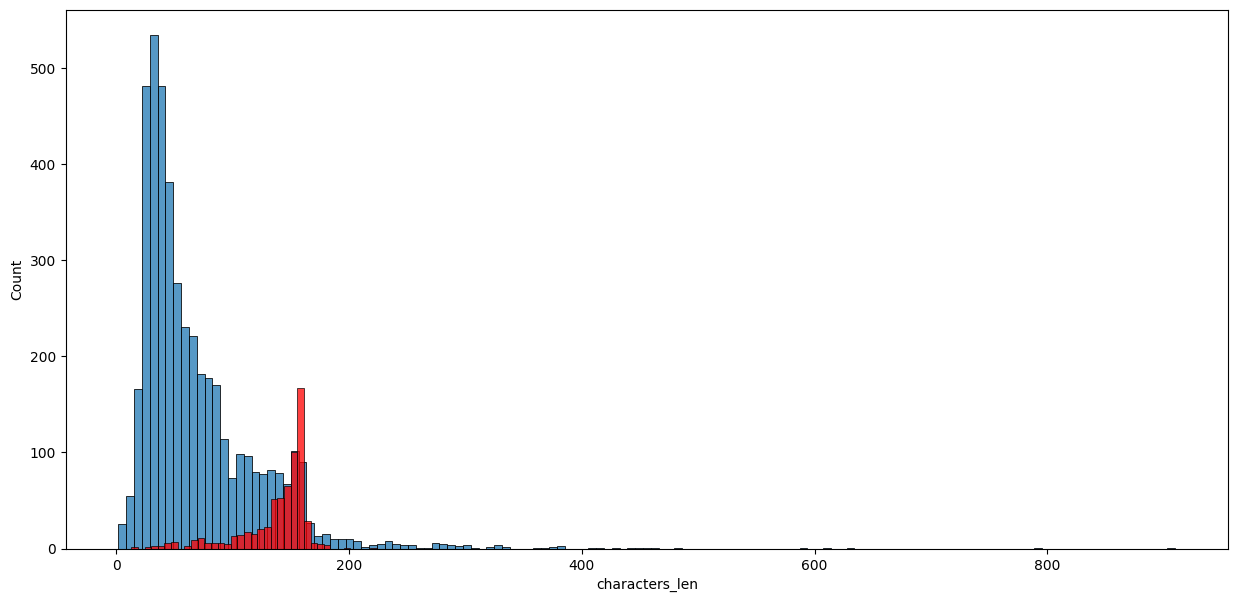

In [56]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['characters_len'])
sns.histplot(df[df['target']==1]['characters_len'],color='red')

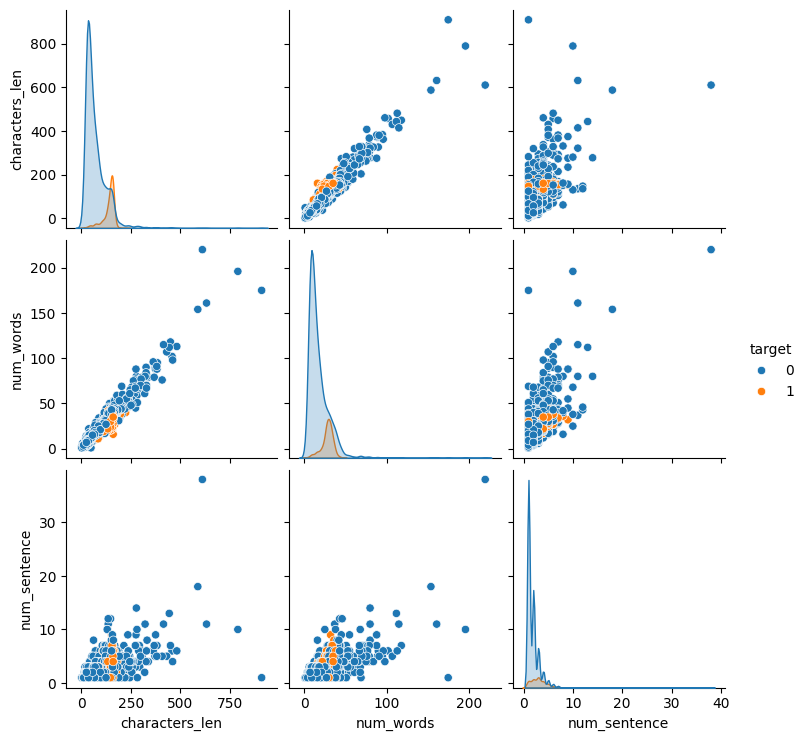

In [58]:
sns.pairplot(df,hue='target')

In [59]:
df[df['target']==1][['num_words','num_sentence','characters_len']].describe()

,num_words,num_sentence,characters_len
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [61]:
numeric_cols = ['num_words', 'num_sentence', 'characters_len']  # Add other relevant numerical columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [62]:
corr_matrix = df[numeric_cols].corr()

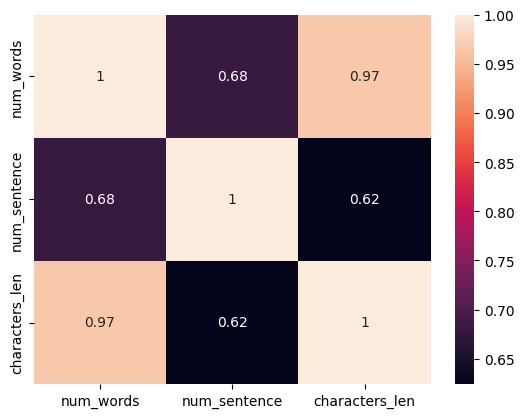

In [63]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [68]:
def transfer(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words ('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [70]:
df['transferred_text']=df['text'].apply(transfer)

In [71]:
df.head()

,target,text,characters_len,num_words,num_sentence,transferred_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [75]:
spam_wc=wc.generate(df[df['target']==1]['transferred_text'].str.cat(sep=" "))

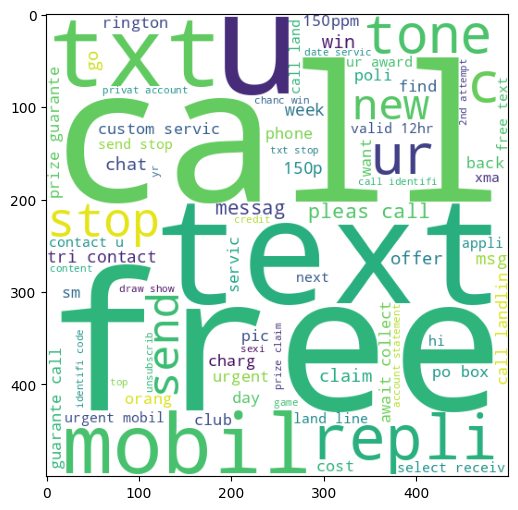

In [76]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [78]:
x=cv.fit_transform(df['transferred_text']).toarray()

In [79]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [80]:
x.shape

(5169, 6708)

In [81]:
y=df['target'].values


In [82]:
y.shape

(5169,)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [85]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [88]:
gnb=GaussianNB()

In [89]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [90]:
sv=SVC()

In [91]:
sv.fit(x_train,y_train)

SVC()

In [93]:
gnb.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred1=gnb.predict(x_test)

In [96]:
y_pred2=rf.predict(x_test)
y_pred3=dt.predict(x_test)
y_pred4=sv.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [98]:
print("Accuracy score of Random Forest is =",accuracy_score(y_pred3,y_test)*100)

Accuracy score of Random Forest is = 96.13152804642166


In [100]:
print("Accuracy score of Randome Forest is =",accuracy_score(y_pred2,y_test)*100)
print("Accuracy score of SVM is =",accuracy_score(y_pred4,y_test)*100)
print("Accuracy score of Decision Tree is =",accuracy_score(y_pred3,y_test)*100)
print("Accuracy score of Naive Bayes is =",accuracy_score(y_pred1,y_test)*100)
print("Precision score of Randome Forest is =",precision_score(y_pred2,y_test)*100)
print("Precision score of SVM is =",precision_score(y_pred4,y_test)*100)
print("Precision score of Decision Tree is =",precision_score(y_pred3,y_test)*100)
print("Precision score of Naive Bayes is =",precision_score(y_pred1,y_test)*100)

Accuracy score of Randome Forest is = 97.77562862669245
Accuracy score of SVM is = 97.38878143133462
Accuracy score of Decision Tree is = 96.13152804642166
Accuracy score of Naive Bayes is = 85.20309477756285
Precision score of Randome Forest is = 79.46428571428571
Precision score of SVM is = 76.78571428571429
Precision score of Decision Tree is = 75.89285714285714
Precision score of Naive Bayes is = 89.28571428571429


In [101]:
print("classification report for random forest")
print(classification_report(y_pred3,y_test))

classification report for random forest
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       936
           1       0.76      0.87      0.81        98

    accuracy                           0.96      1034
   macro avg       0.87      0.92      0.89      1034
weighted avg       0.96      0.96      0.96      1034



**END **